In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
df=  pd.read_csv("../data/data.csv")

COLUMN kepid: KepID  
COLUMN kepoi_name: KOI Name  
COLUMN kepler_name: Kepler Name  
COLUMN koi_disposition: Exoplanet Archive Disposition  
COLUMN koi_vet_stat: Vetting Status  
COLUMN koi_vet_date: Date of Last Parameter Update  
COLUMN koi_pdisposition: Disposition Using Kepler Data  
COLUMN koi_score: Disposition Score  
COLUMN koi_fpflag_nt: Not Transit-Like False Positive Flag  
COLUMN koi_fpflag_ss: Stellar Eclipse False Positive Flag  
COLUMN koi_fpflag_co: Centroid Offset False Positive Flag  
COLUMN koi_fpflag_ec: Ephemeris Match Indicates Contamination False Positive Flag  
COLUMN koi_disp_prov: Disposition Provenance  
COLUMN koi_comment: Comment  
COLUMN koi_period: Orbital Period [days]  
COLUMN koi_time0bk: Transit Epoch [BKJD]  
COLUMN koi_time0: Transit Epoch [BJD]  
COLUMN koi_eccen: Eccentricity  
COLUMN koi_longp: Long. of Periastron [deg]  
COLUMN koi_impact: Impact Parameter  
COLUMN koi_duration: Transit Duration [hrs]  
COLUMN koi_ingress: Ingress Duration [hrs]  
COLUMN koi_depth: Transit Depth [ppm]  
COLUMN koi_ror: Planet-Star Radius Ratio  
COLUMN koi_srho: Fitted Stellar Density [g/cm3]  
COLUMN koi_fittype: Planetary Fit Type  
COLUMN koi_prad: Planetary Radius [Earth radii]  
COLUMN koi_sma: Orbit Semi-Major Axis [au]  
COLUMN koi_incl: Inclination [deg]  
COLUMN koi_teq: Equilibrium Temperature [K]  
COLUMN koi_insol: Insolation Flux [Earth flux]  
COLUMN koi_dor: Planet-Star Distance over Star Radius  
COLUMN koi_limbdark_mod: Limb Darkening Model  
COLUMN koi_ldm_coeff4: Limb Darkening Coeff. 4  
COLUMN koi_ldm_coeff3: Limb Darkening Coeff. 3  
COLUMN koi_ldm_coeff2: Limb Darkening Coeff. 2  
COLUMN koi_ldm_coeff1: Limb Darkening Coeff. 1  
COLUMN koi_parm_prov: Parameters Provenance  
COLUMN koi_max_sngle_ev: Maximum Single Event Statistic  
COLUMN koi_max_mult_ev: Maximum Multiple Event Statistic  
COLUMN koi_model_snr: Transit Signal-to-Noise  
COLUMN koi_count: Number of Planets  
COLUMN koi_num_transits: Number of Transits  
COLUMN koi_tce_plnt_num: TCE Planet Number  
COLUMN koi_tce_delivname: TCE Delivery  
COLUMN koi_quarters: Quarters  
COLUMN koi_bin_oedp_sig: Odd-Even Depth Comparision Statistic  
COLUMN koi_trans_mod: Transit Model  
COLUMN koi_model_dof: Degrees of Freedom  
COLUMN koi_model_chisq: Chi-Square  
COLUMN koi_datalink_dvr: Link to DV Report  
COLUMN koi_datalink_dvs: Link to DV Summary  
COLUMN koi_steff: Stellar Effective Temperature [K]  
COLUMN koi_slogg: Stellar Surface Gravity [log10(cm/s2)]  
COLUMN koi_smet: Stellar Metallicity [dex]  
COLUMN koi_srad: Stellar Radius [Solar radii]  
COLUMN koi_smass: Stellar Mass [Solar mass]  
COLUMN koi_sage: Stellar Age [Gyr]  
COLUMN koi_sparprov: Stellar Parameter Provenance  
COLUMN ra: RA [decimal degrees]  
COLUMN dec: Dec [decimal degrees]  
COLUMN koi_kepmag: Kepler-band [mag]  
COLUMN koi_gmag: g'-band [mag]  
COLUMN koi_rmag: r'-band [mag]  
COLUMN koi_imag: i'-band [mag]  
COLUMN koi_zmag: z'-band [mag]  
COLUMN koi_jmag: J-band [mag]  
COLUMN koi_hmag: H-band [mag]  
COLUMN koi_kmag: K-band [mag]  
COLUMN koi_fwm_stat_sig: FW Offset Significance [percent]  
COLUMN koi_fwm_sra: FW Source α(OOT) [hrs]  
COLUMN koi_fwm_sdec: FW Source δ(OOT) [deg]  
COLUMN koi_fwm_srao: FW Source Δα(OOT) [sec]  
COLUMN koi_fwm_sdeco: FW Source Δδ(OOT) [arcsec]  
COLUMN koi_fwm_prao: FW Δα(OOT) [sec]  
COLUMN koi_fwm_pdeco: FW Δδ(OOT) [arcsec]  
COLUMN koi_dicco_mra: PRF ΔαSQ(OOT) [arcsec]  
COLUMN koi_dicco_mdec: PRF ΔδSQ(OOT) [arcsec]  
COLUMN koi_dicco_msky: PRF ΔθSQ(OOT) []arcsec  
COLUMN koi_dikco_mra: PRF ΔαSQ(KIC) [arcsec]  
COLUMN koi_dikco_mdec: PRF ΔδSQ(KIC) [arcsec]  
COLUMN koi_dikco_msky: PRF ΔθSQ(KIC) [arcsec]  



In [40]:
# data without candidates in koi_disposition
df = df[df.koi_disposition != 'CANDIDATE']

In [41]:
# data where nasa predictions where wrong
df_wrong = df[(df['koi_disposition'] == 'CONFIRMED') & (df['koi_pdisposition'] == 'FALSE POSITIVE')]

In [14]:
df_wrong 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
274,275,11449844,K00125.01,Kepler-468 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.920,0,...,0.0394,-0.1583,0.000100,-0.00030,0.004,-0.014,0.014,0.043,-0.347,0.349
519,520,11974540,K00129.01,Kepler-470 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,1.000,0,...,0.1260,0.2200,0.001800,-0.00071,-0.195,0.127,0.233,-0.005,0.016,0.017
778,779,7532973,K01450.01,Kepler-854 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.041,0,...,-0.0590,0.0941,-0.000690,-0.00057,0.055,0.116,0.128,0.011,0.069,0.070
953,954,11517719,K01416.01,Kepler-840 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.920,0,...,0.0495,0.0453,0.000800,0.00120,-0.011,-0.017,0.020,-0.059,-0.088,0.106
2210,2211,8478994,K00245.04,Kepler-37 e,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2767,2768,10585738,K03032.01,Kepler-1415 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.973,0,...,-1.1000,2.7000,0.000120,-0.00033,0.270,-0.420,0.500,0.130,-0.470,0.490
3043,3044,6444896,K03138.02,Kepler-1649 c,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.374,1,...,-0.6000,-1.7000,-0.001500,0.00090,0.200,0.220,0.280,-1.500,-0.990,1.800
3385,3386,4742414,K00631.01,Kepler-628 b,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,0.999,0,...,-0.0050,0.0760,0.000008,0.00004,0.006,0.001,0.006,0.004,0.103,0.103
7632,7633,4735826,K03184.02,Kepler-1972 c,CONFIRMED,Done,2018-08-16,FALSE POSITIVE,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# delete data from df where nasa predictions where wrong
df = df[~df.index.isin(df_wrong.index)]

In [43]:
df.drop(columns = ['rowid'
                  , 'kepid'
                  , 'kepoi_name'
                  , 'kepler_name'
                  , 'koi_score'
                  , 'koi_fpflag_nt'
                  , 'koi_fpflag_ss'
                  , 'koi_fpflag_co'
                  , 'koi_fpflag_ec'
                  , 'koi_vet_stat'
                  , 'koi_vet_date'
                  , 'koi_disp_prov'
                  , 'koi_comment'
                  , 'koi_parm_prov'
                  , 'koi_tce_delivname'
                  , 'koi_trans_mod'
                  , 'koi_datalink_dvr'
                  , 'koi_datalink_dvs'
                  , 'koi_sparprov'
                  , 'koi_fittype'
                  ], inplace=True)
df_wrong.drop(columns = ['rowid'
                  , 'kepid'
                  , 'kepoi_name'
                  , 'kepler_name'
                  , 'koi_score'
                  , 'koi_fpflag_nt'
                  , 'koi_fpflag_ss'
                  , 'koi_fpflag_co'
                  , 'koi_fpflag_ec'
                  , 'koi_vet_stat'
                  , 'koi_vet_date'
                  , 'koi_disp_prov'
                  , 'koi_comment'
                  , 'koi_parm_prov'
                  , 'koi_tce_delivname'
                  , 'koi_trans_mod'
                  , 'koi_datalink_dvr'
                  , 'koi_datalink_dvs'
                  , 'koi_sparprov'
                  , 'koi_fittype'
                  ], inplace=True)

In [44]:
df = df[df['koi_disposition'] != 'CANDIDATE']
df['koi_disposition'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
df.drop(columns = ['koi_pdisposition'], inplace=True)
df.rename(columns = {'koi_disposition': 'label'}, inplace=True)

df_wrong = df_wrong[df_wrong['koi_disposition'] != 'CANDIDATE']
df_wrong['koi_disposition'] = df_wrong['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
df_wrong.drop(columns = ['koi_pdisposition'], inplace=True)
df_wrong.rename(columns = {'koi_disposition': 'label'}, inplace=True)

In [18]:
df.to_csv("../data/data_clean.csv", index=False)

In [19]:
df.columns

Index(['label', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen',
       'koi_longp', 'koi_impact', 'koi_duration', 'koi_ingress', 'koi_depth',
       'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq',
       'koi_insol', 'koi_dor', 'koi_limbdark_mod', 'koi_ldm_coeff4',
       'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1',
       'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
       'koi_num_transits', 'koi_tce_plnt_num', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_model_dof', 'koi_model_chisq', 'koi_steff',
       'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage', 'ra',
       'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag',
       'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra',
       'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao',
       'koi_fwm_pdeco', 'koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky',
       'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco

In [20]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
# Check for missing values
df.isnull().sum() 

label               0
koi_period          0
koi_time0bk         0
koi_time0           0
koi_eccen         258
                 ... 
koi_dicco_mdec    506
koi_dicco_msky    506
koi_dikco_mra     484
koi_dikco_mdec    484
koi_dikco_msky    484
Length: 62, dtype: int64

In [45]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values / len(df)
missing_values
cols_with_missing = missing_values[missing_values ==1 ].index
cols_with_missing

Index(['koi_sage', 'koi_ingress', 'koi_model_dof', 'koi_longp',
       'koi_model_chisq'],
      dtype='object')

In [46]:
df_wrong.isnull().sum()

label             0
koi_period        0
koi_time0bk       0
koi_time0         0
koi_eccen         1
                 ..
koi_dicco_mdec    2
koi_dicco_msky    2
koi_dikco_mra     2
koi_dikco_mdec    2
koi_dikco_msky    2
Length: 62, dtype: int64

In [47]:
df_wrong.fillna((df_wrong.select_dtypes(include='number')).median(), inplace=True)

In [48]:
df.drop(cols_with_missing, axis=1, inplace=True)

In [49]:
# impute missing values with mean
df.fillna(df.select_dtypes(include='number').median(), inplace=True)


<Axes: >

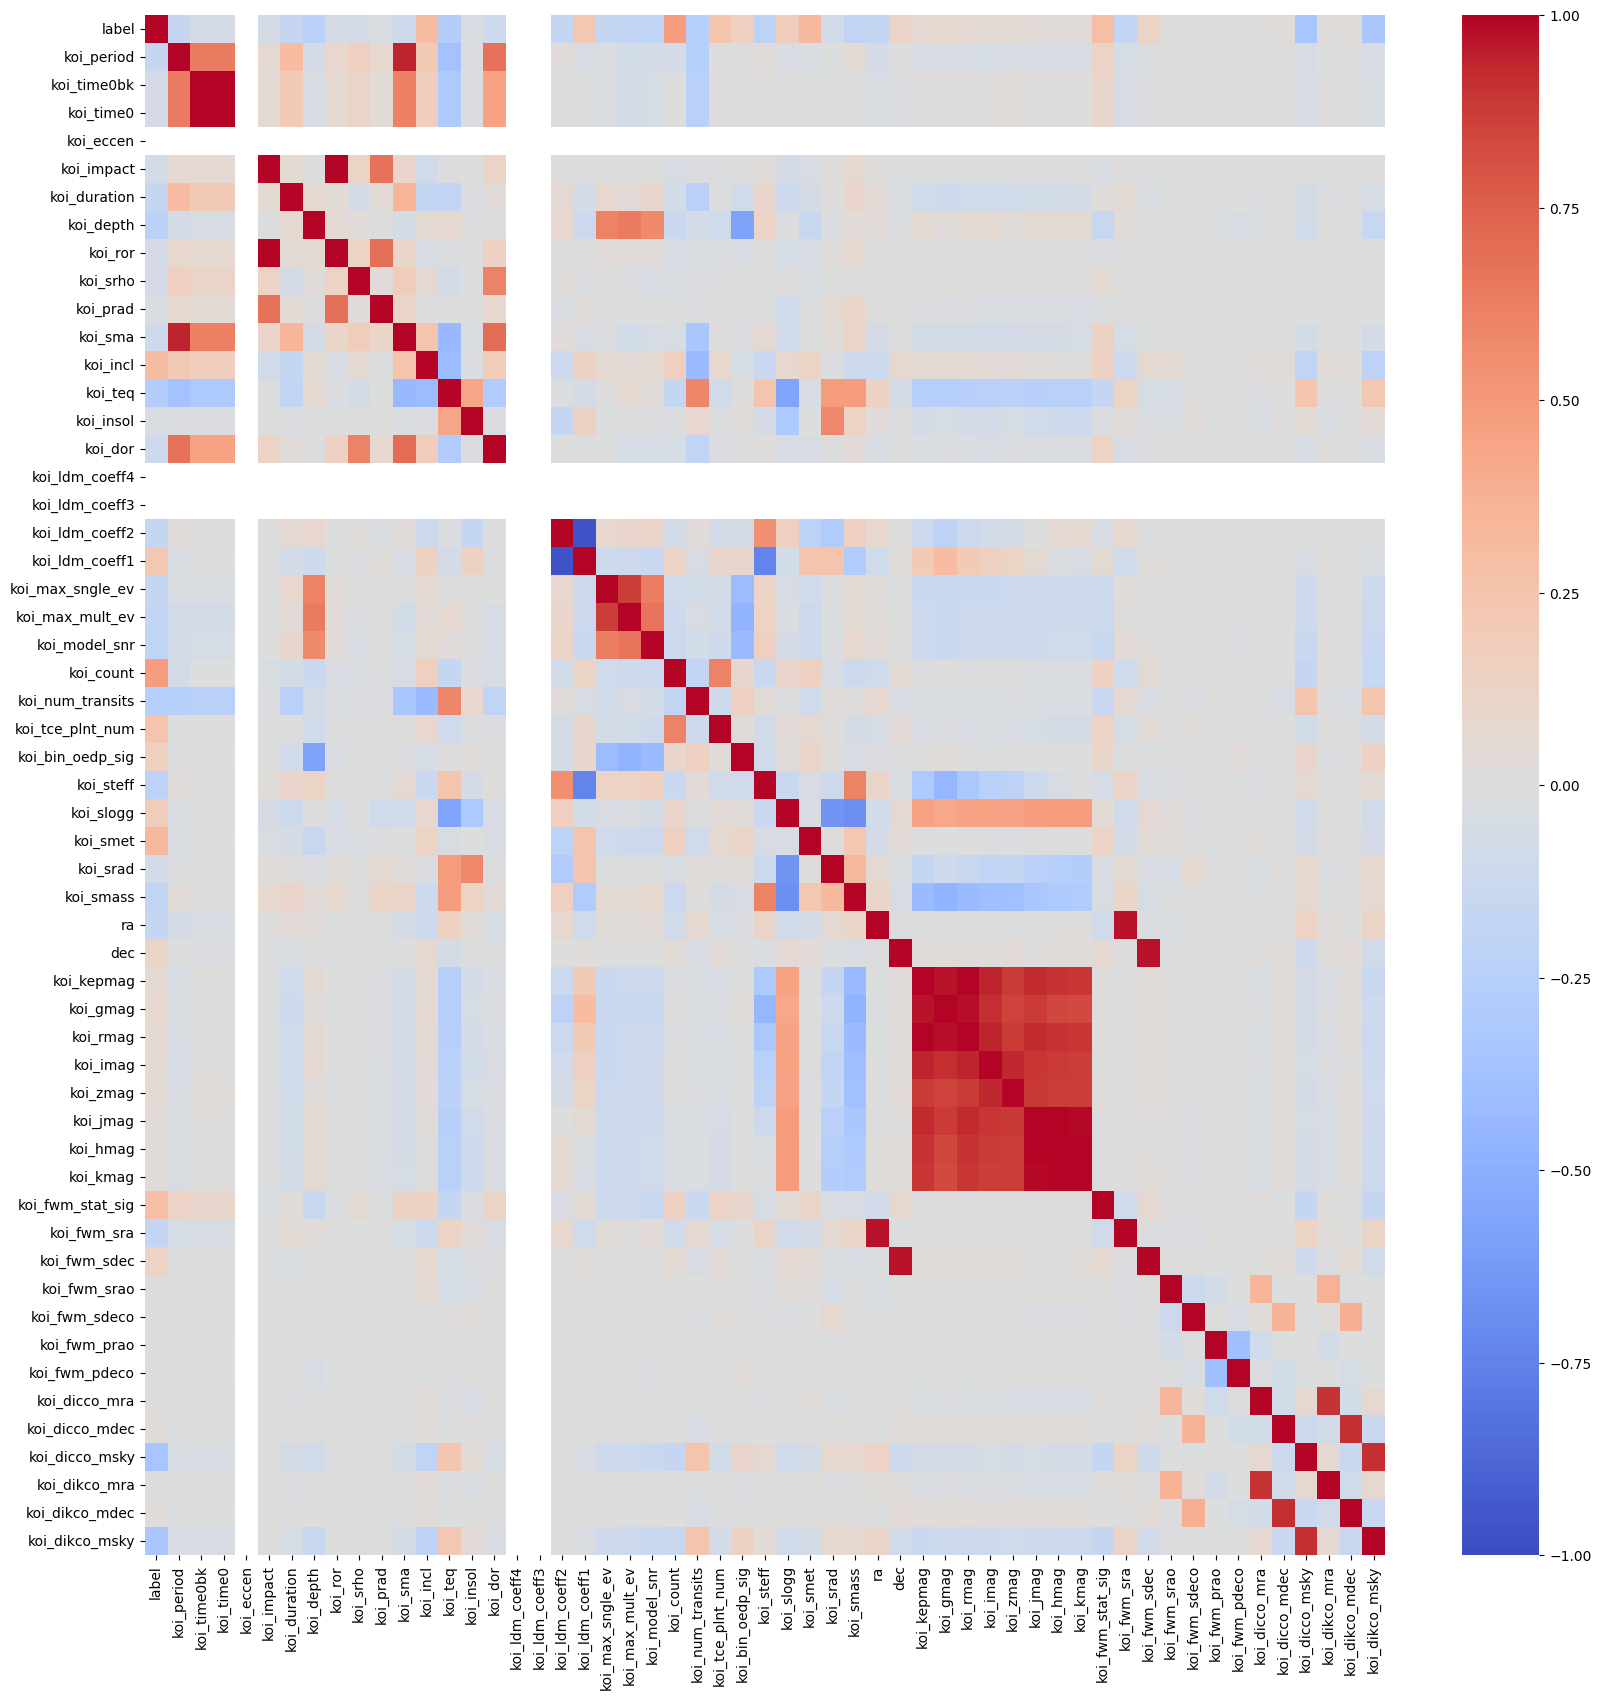

In [25]:
# correlation
# only for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, vmin = -1, cmap='coolwarm')

<Axes: >

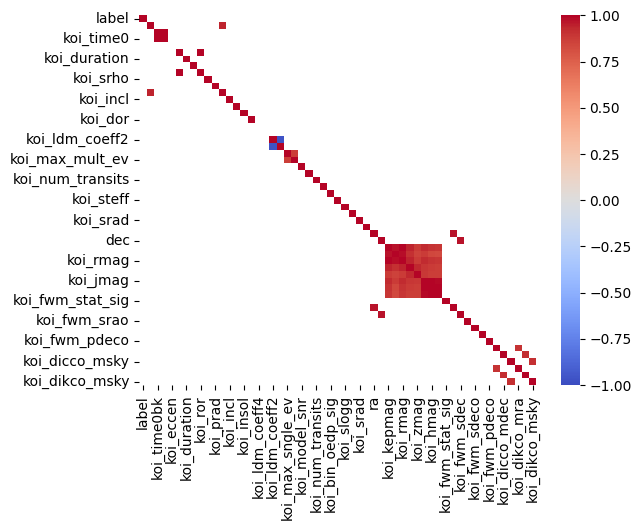

In [26]:
# high and low correlation
high = correlation[abs(correlation) > 0.8]
sns.heatmap(high, vmax=1, vmin = -1, cmap='coolwarm')

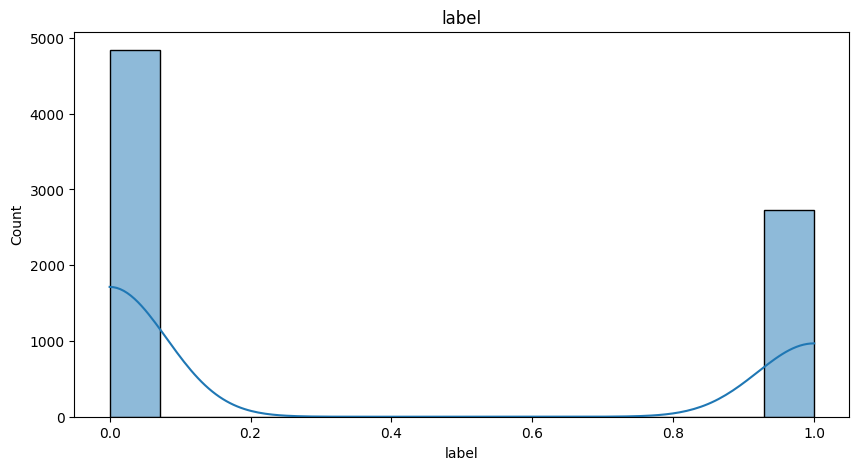

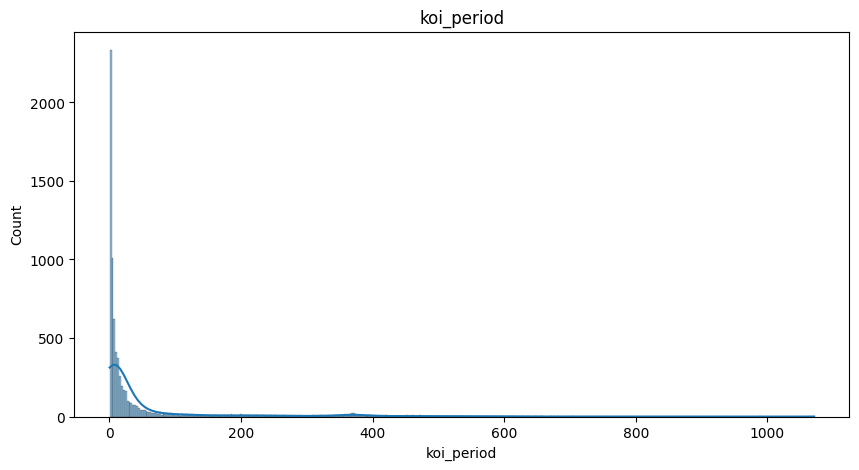

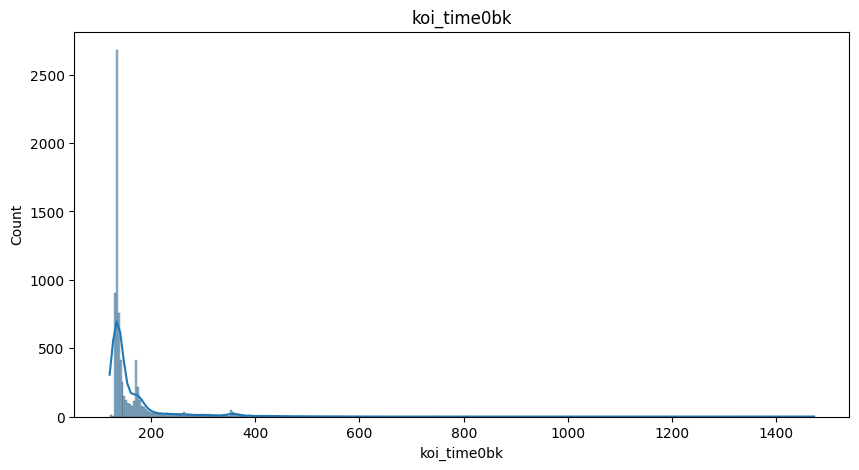

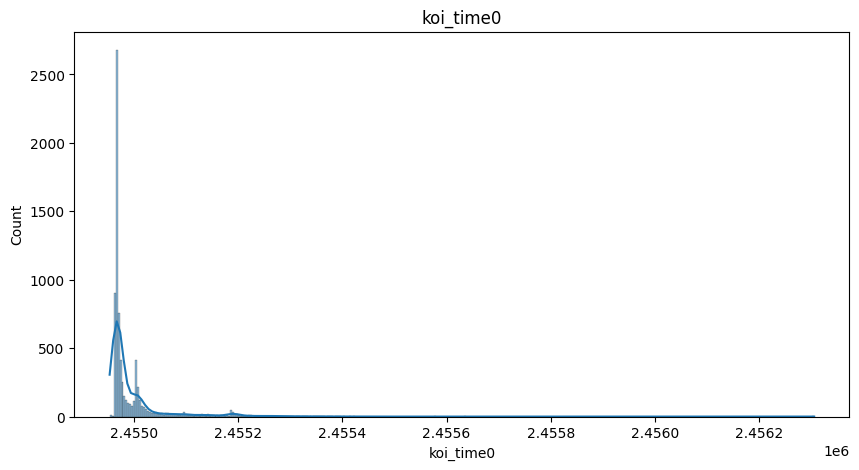

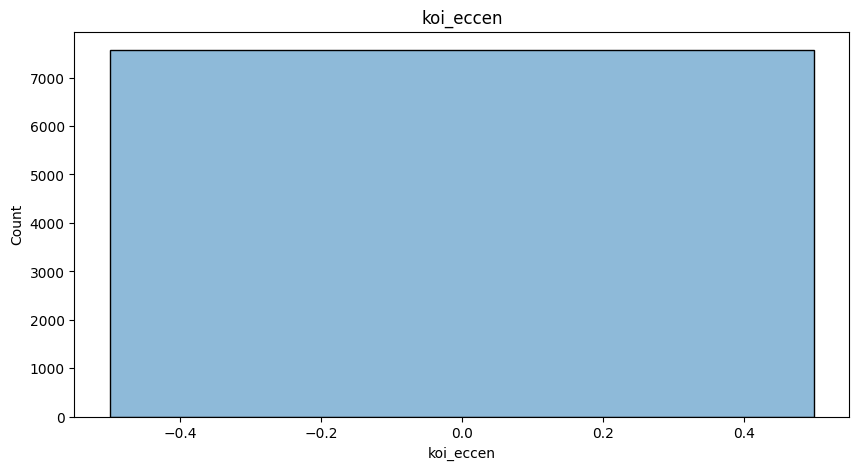

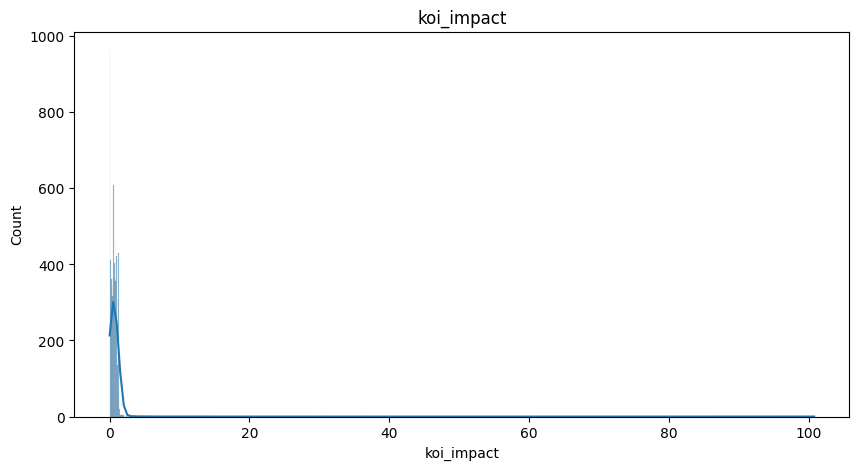

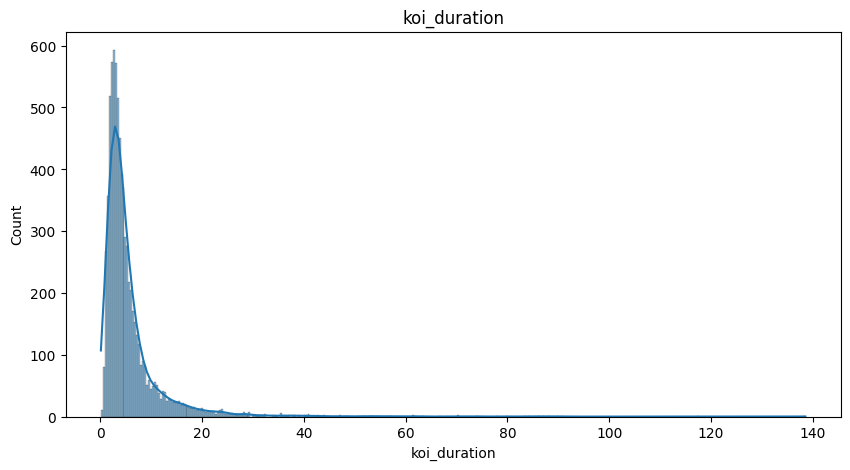

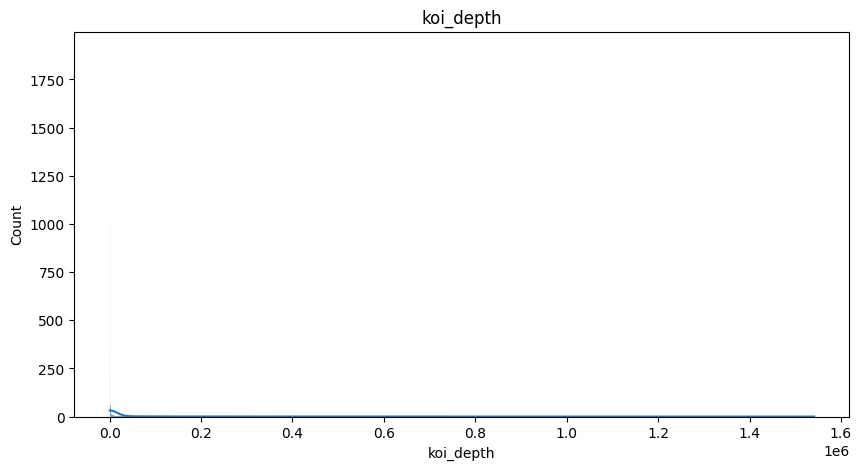

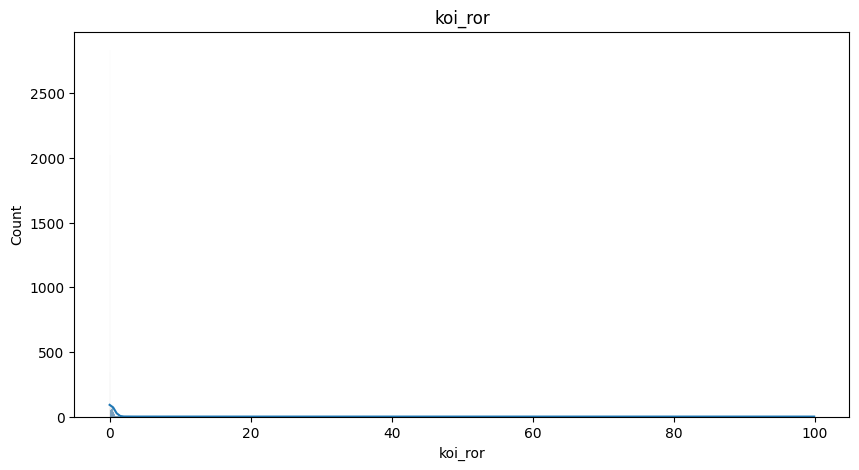

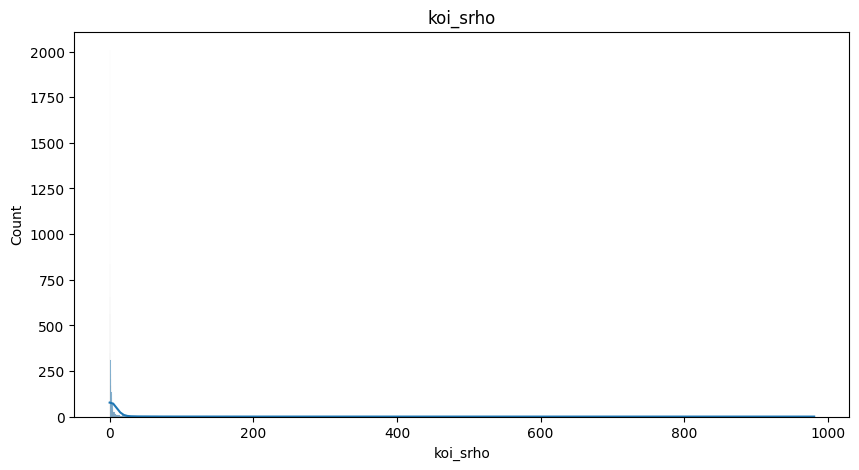

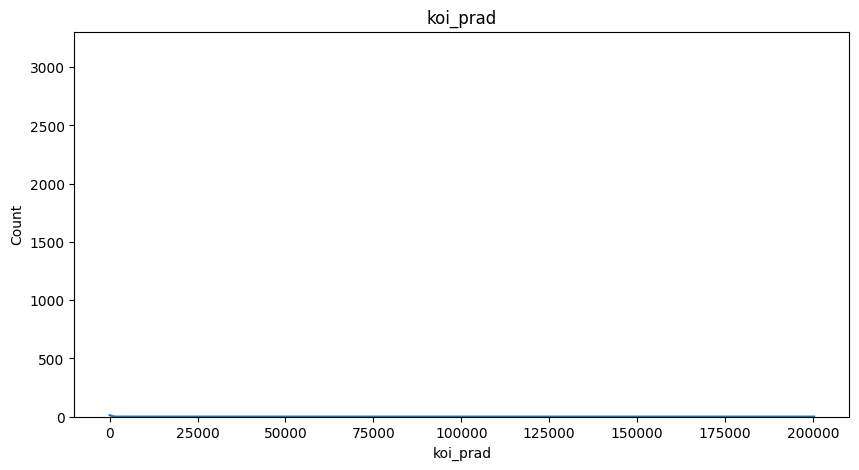

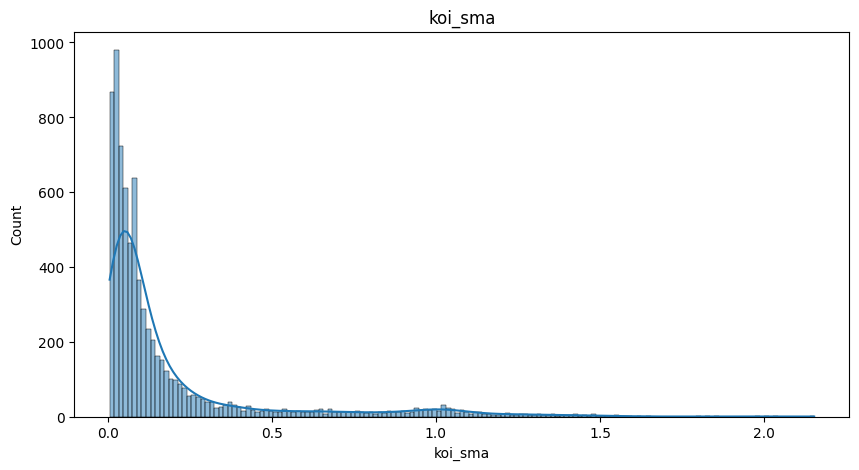

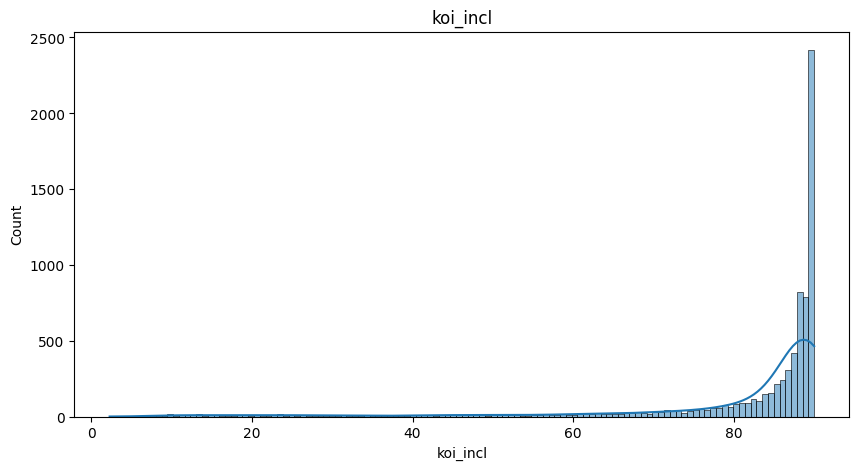

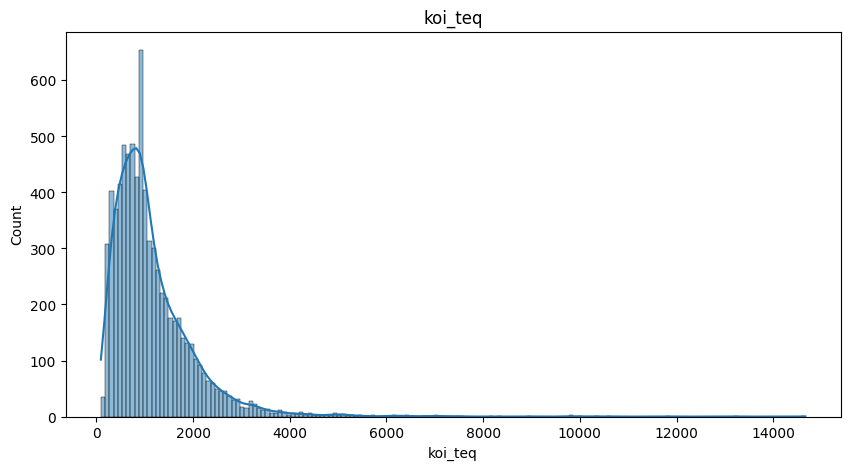

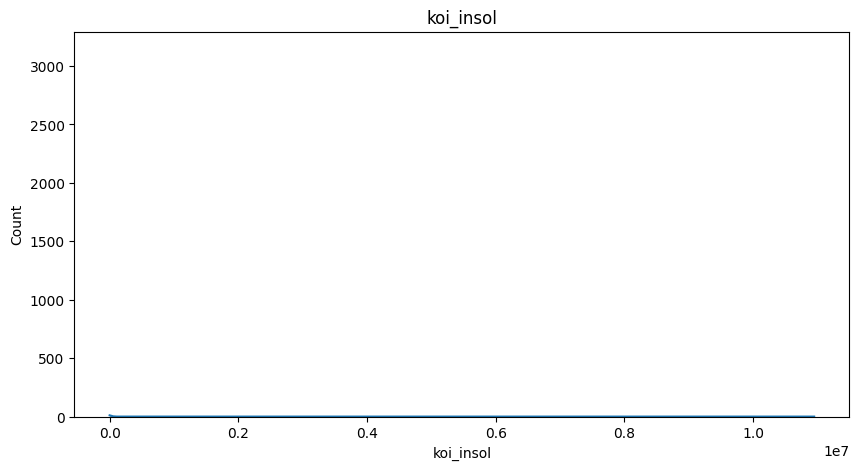

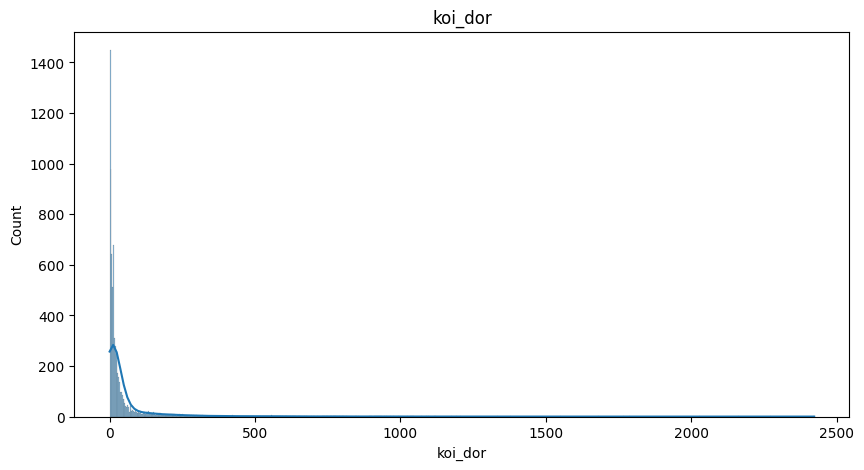

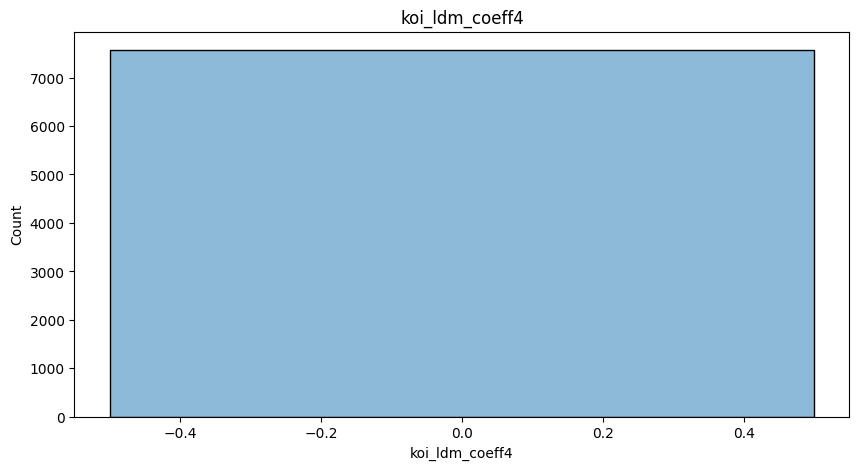

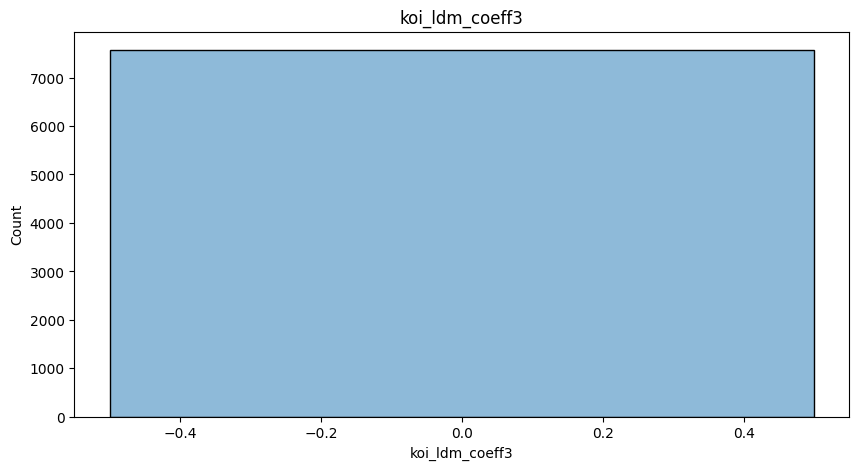

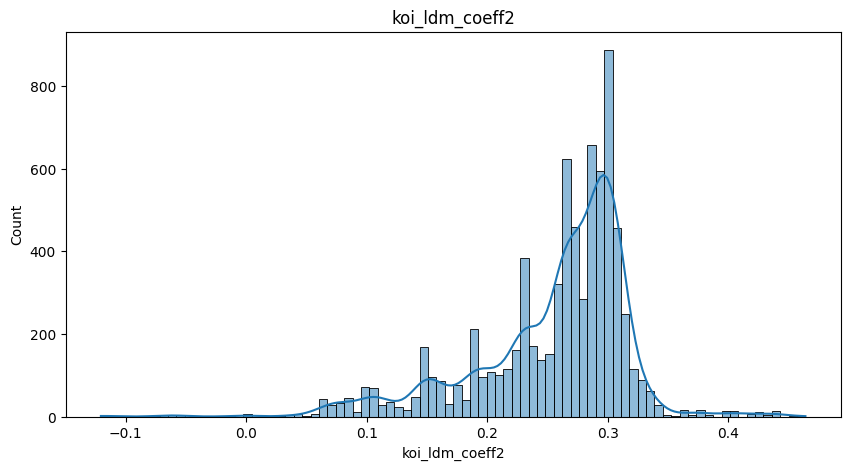

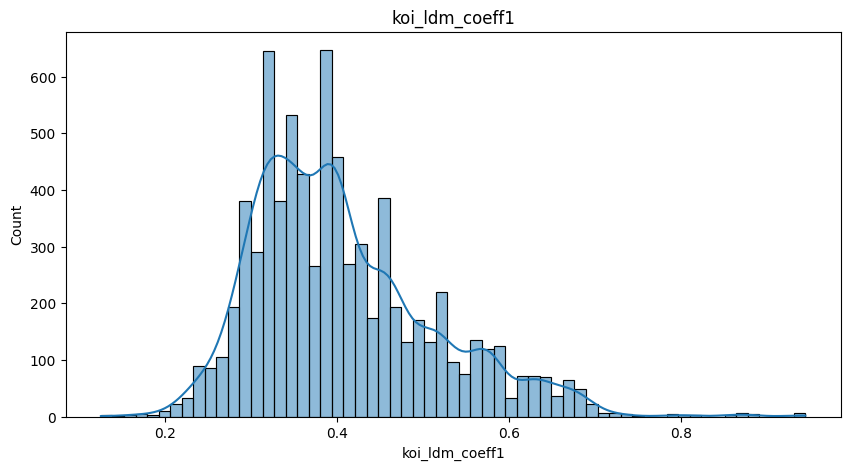

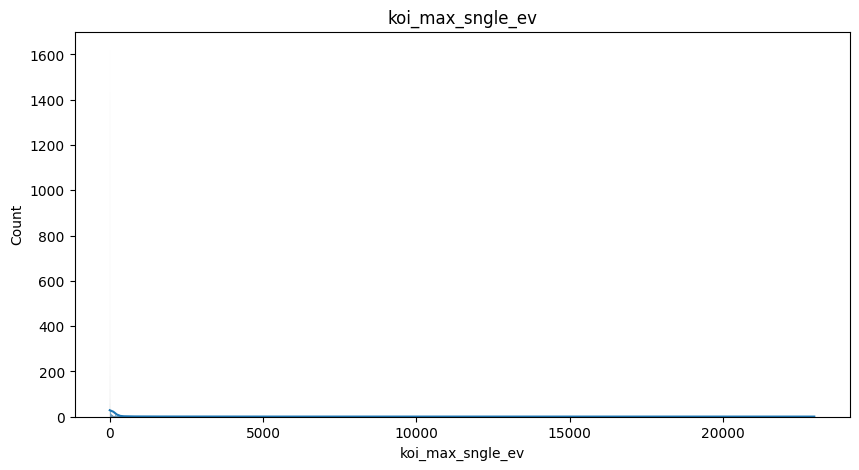

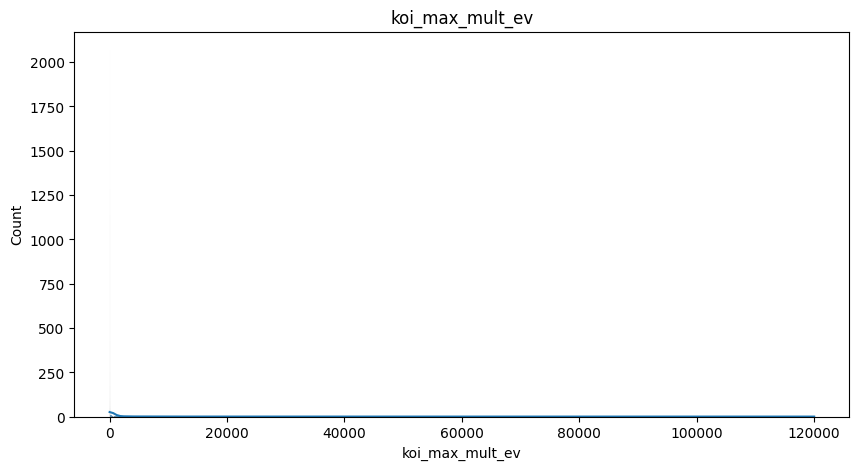

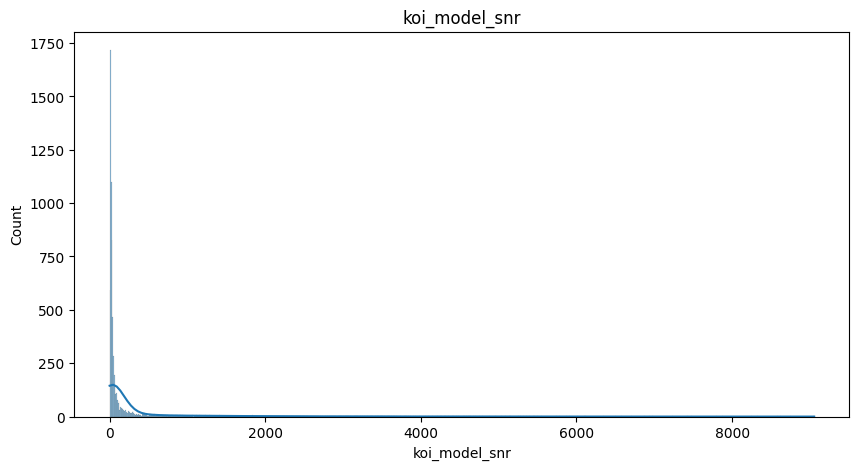

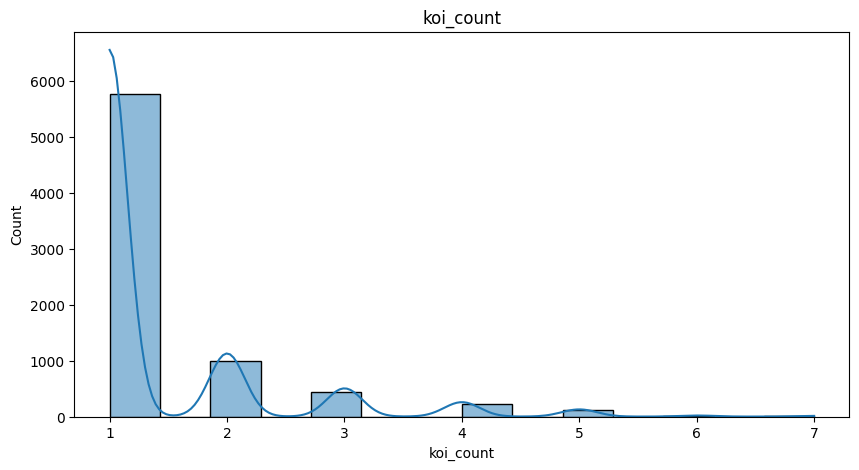

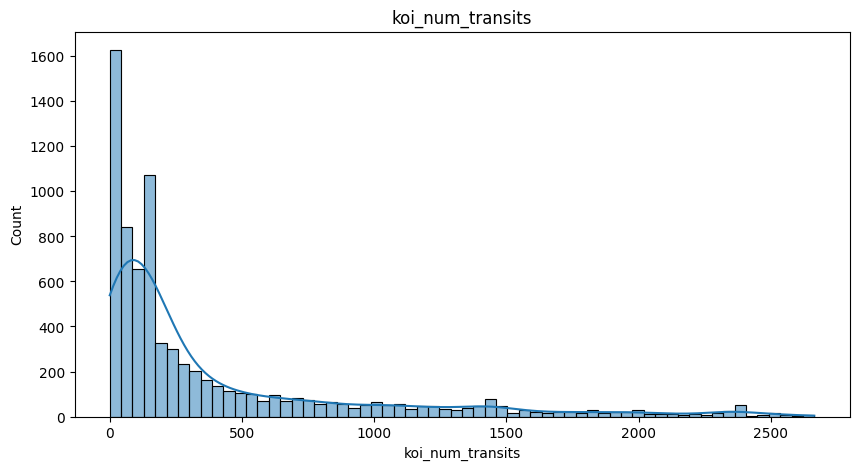

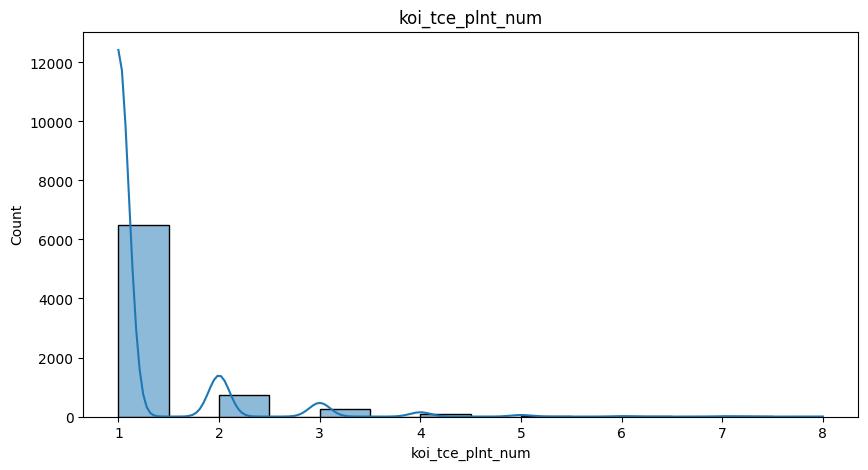

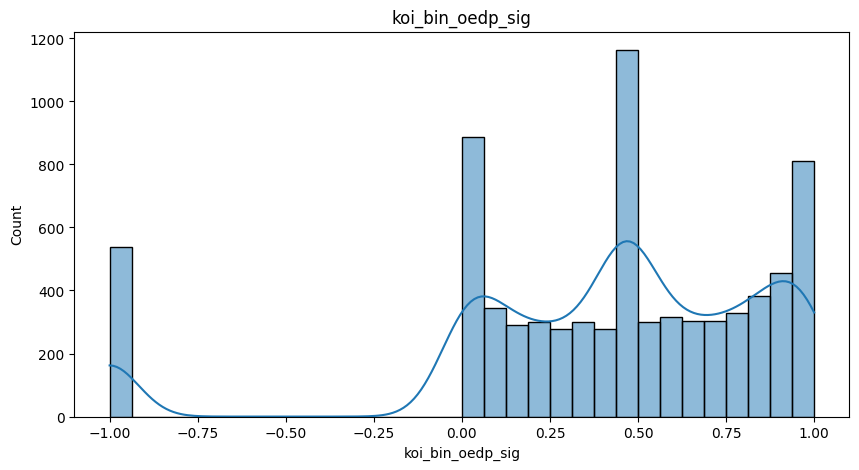

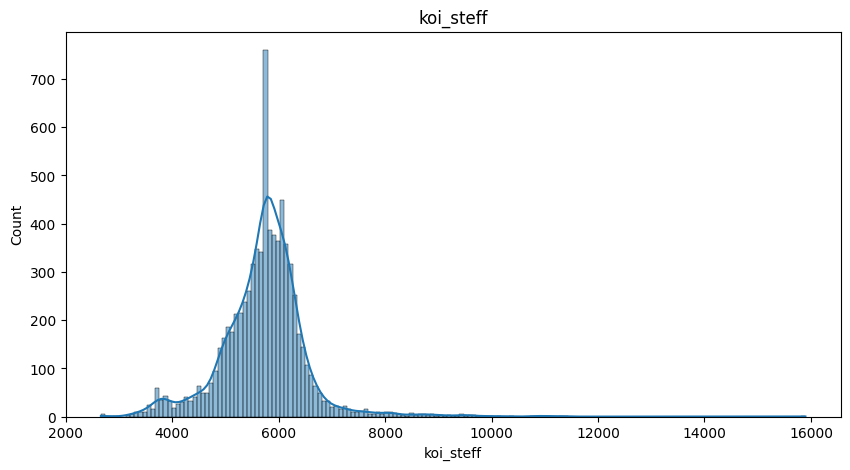

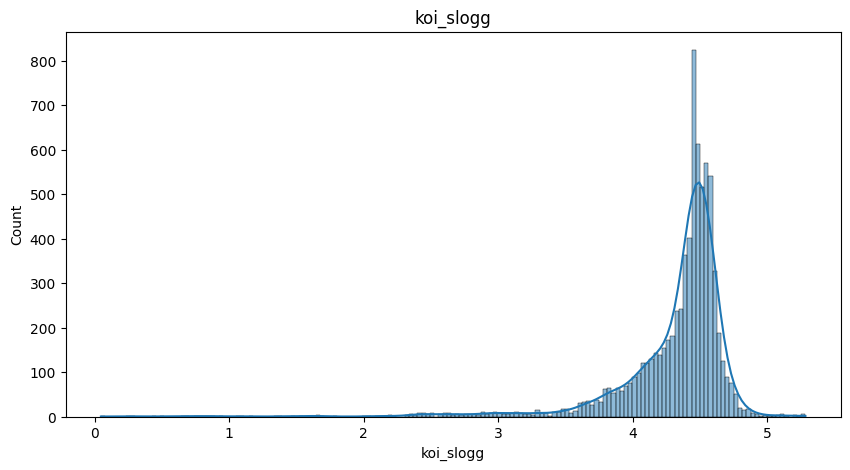

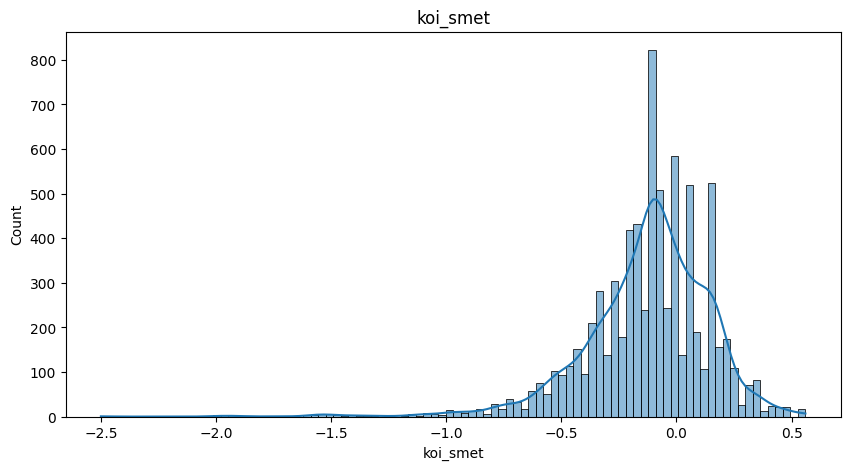

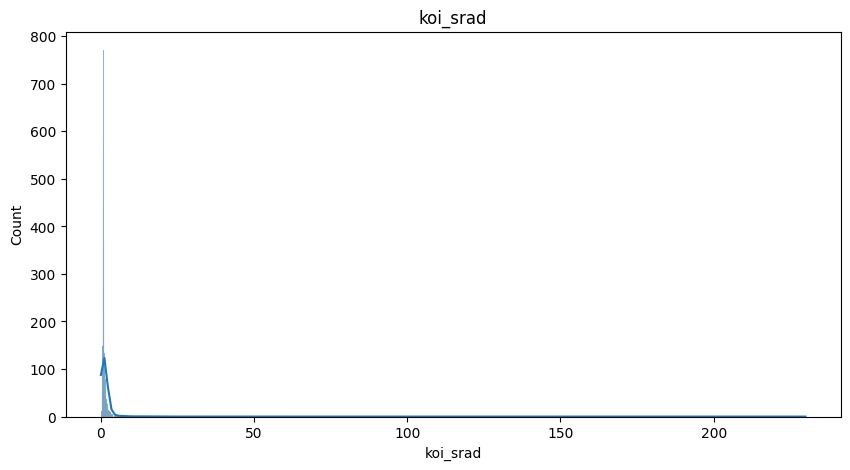

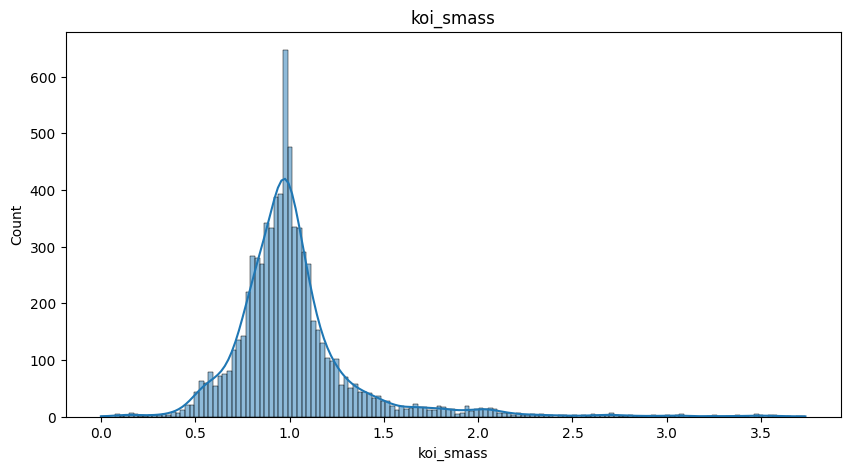

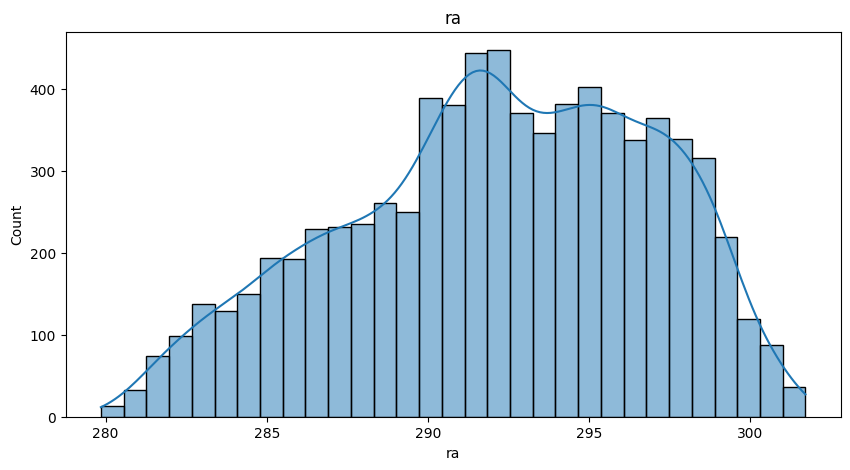

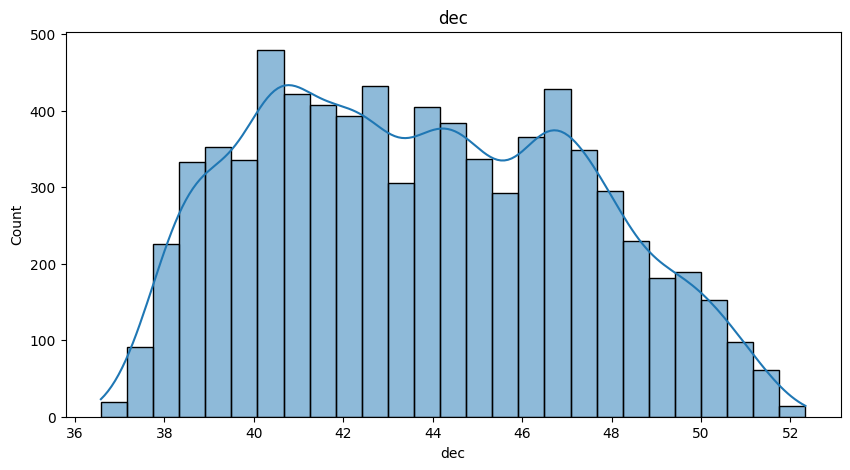

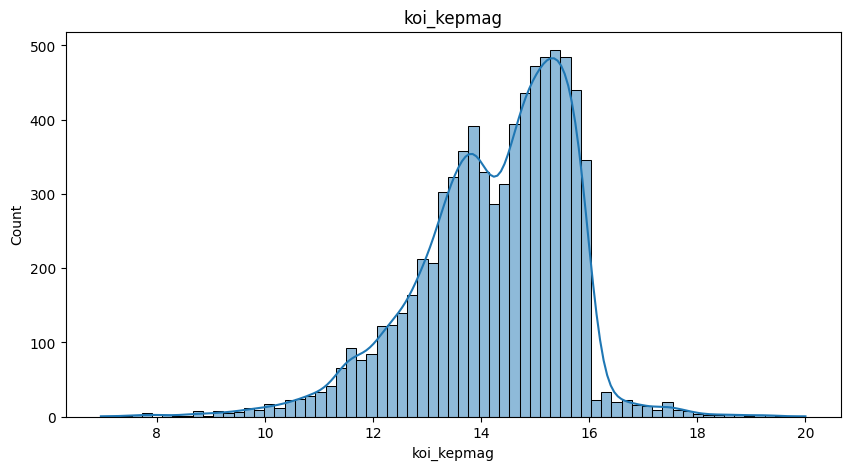

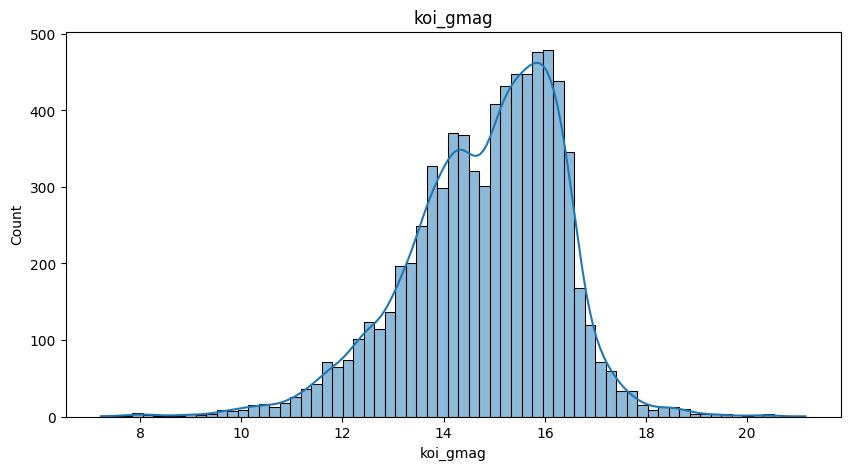

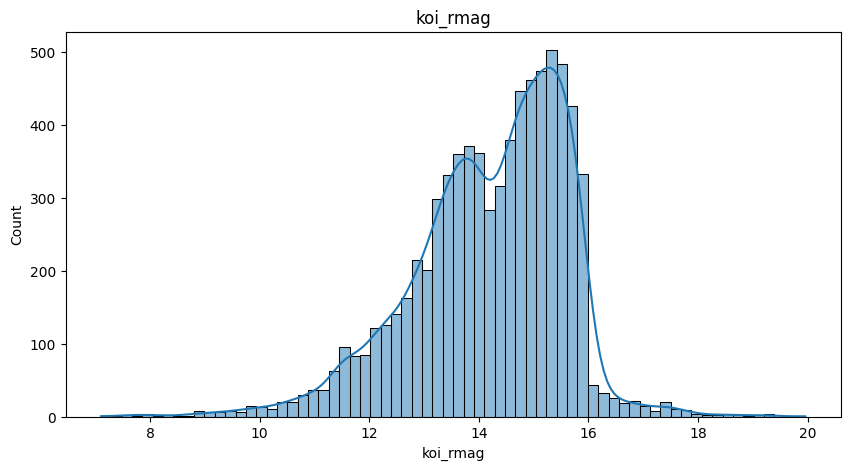

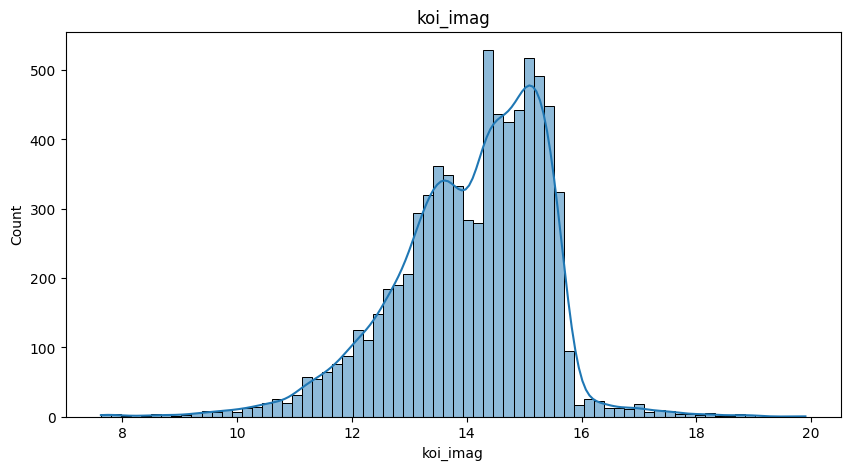

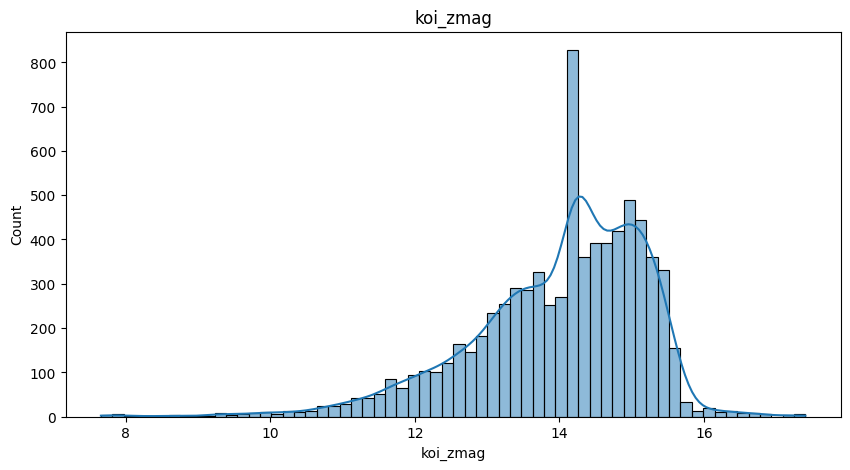

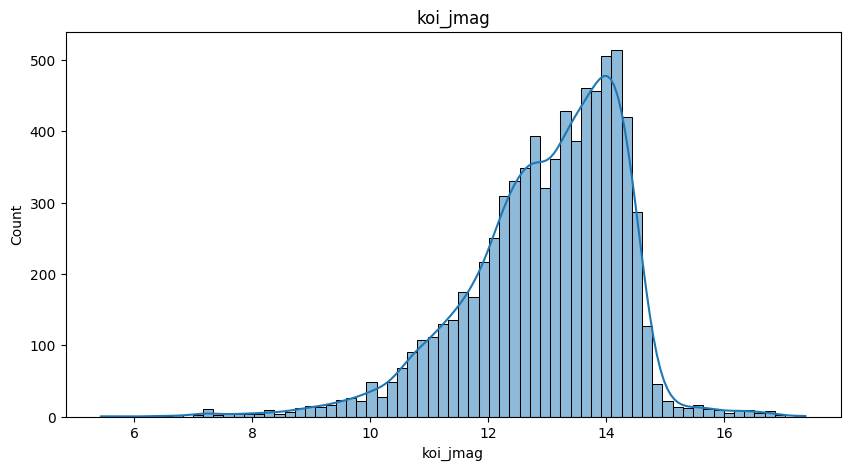

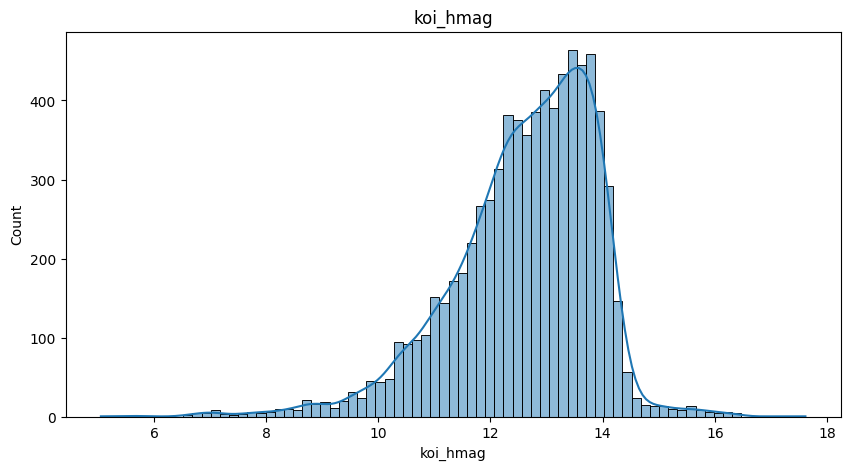

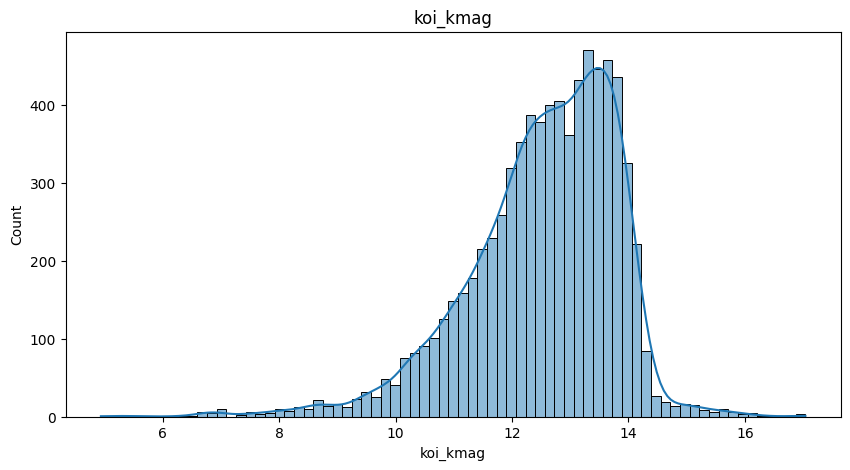

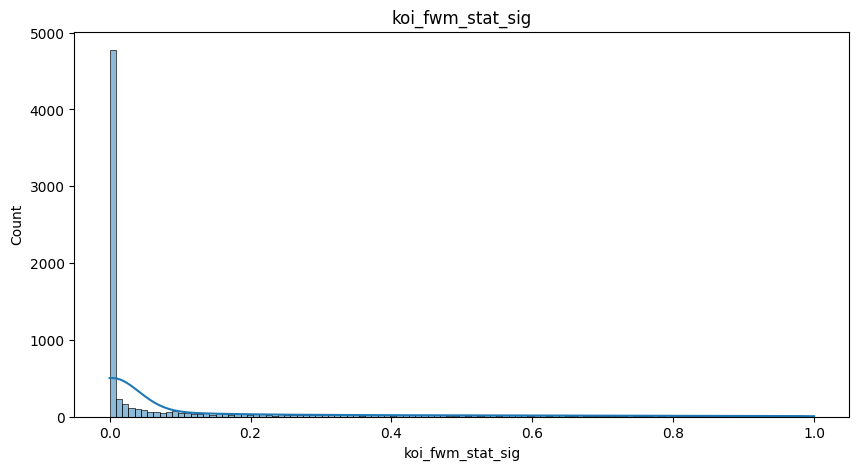

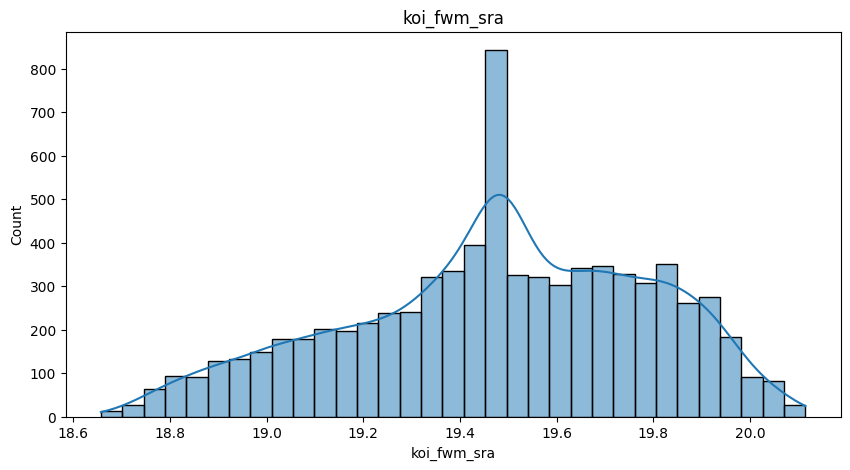

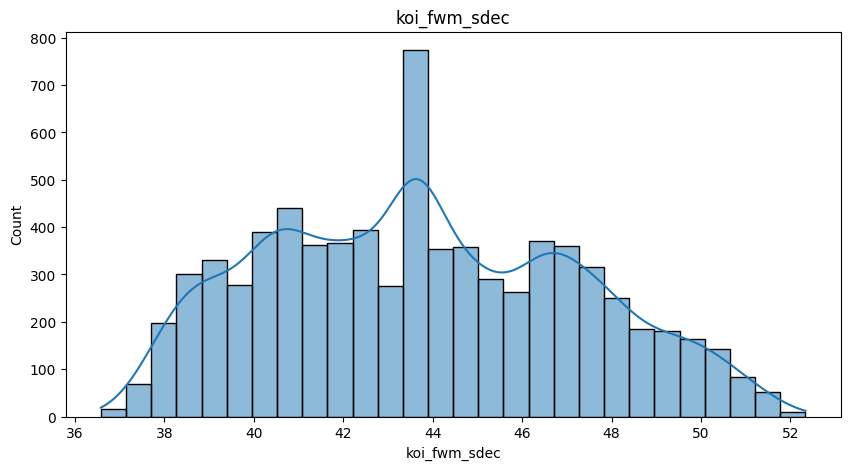

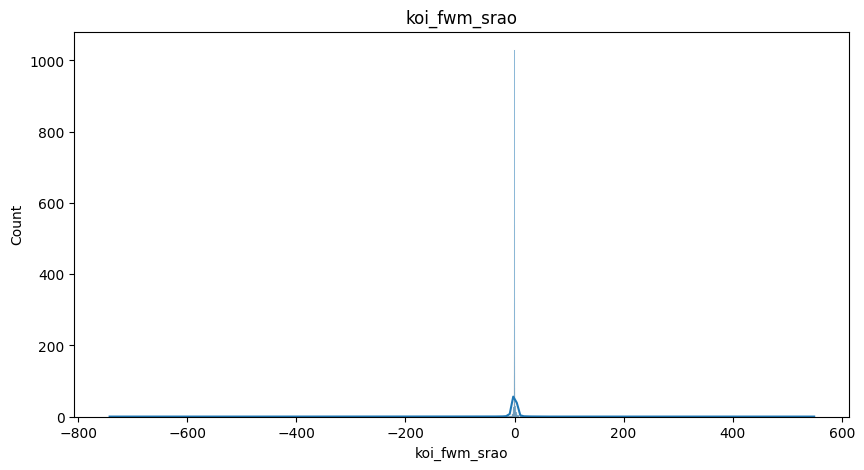

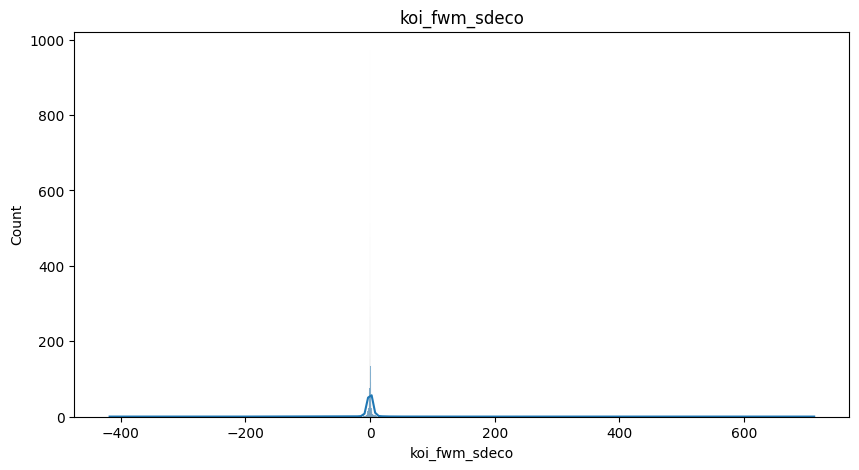

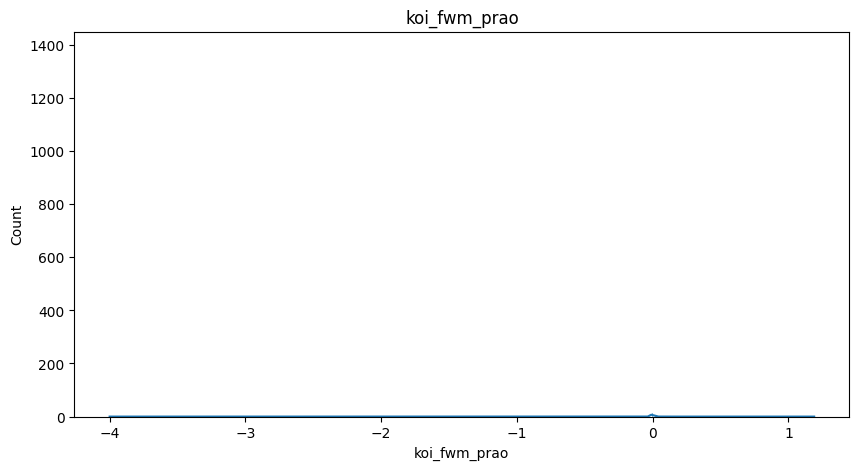

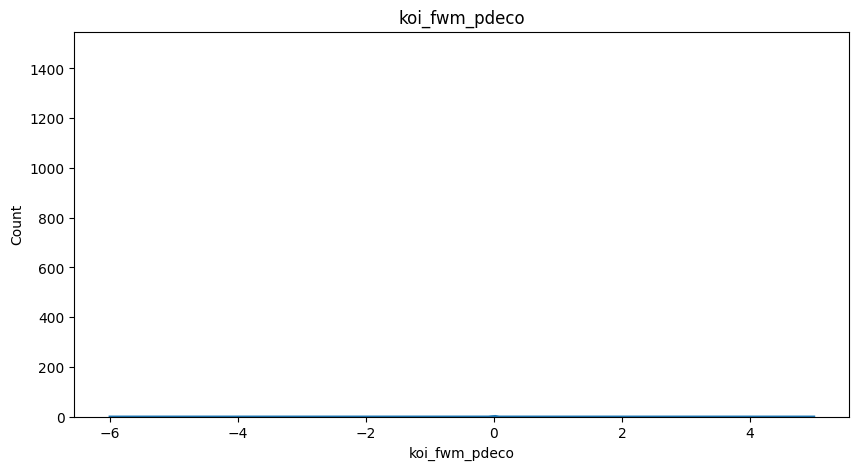

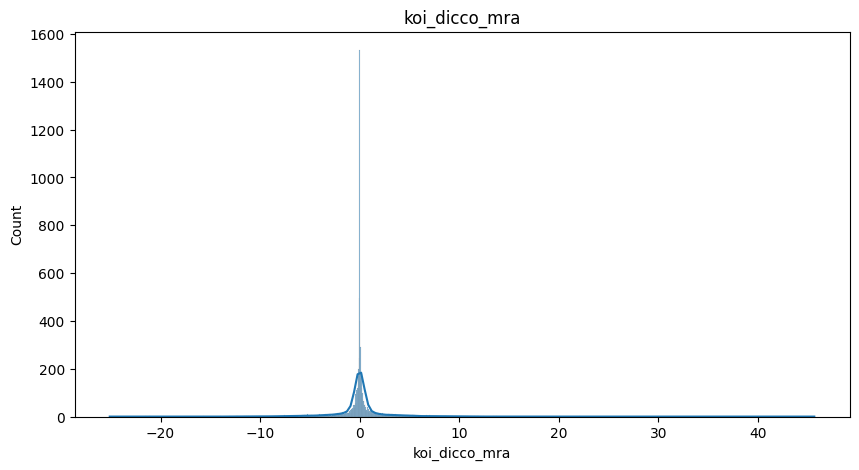

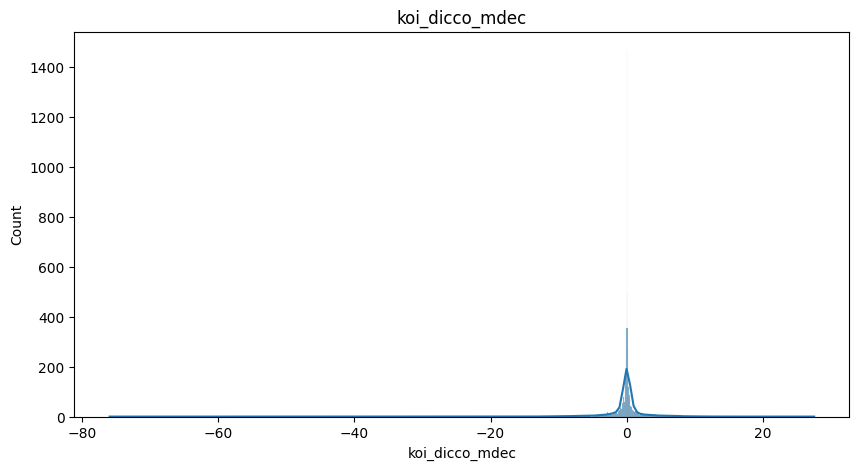

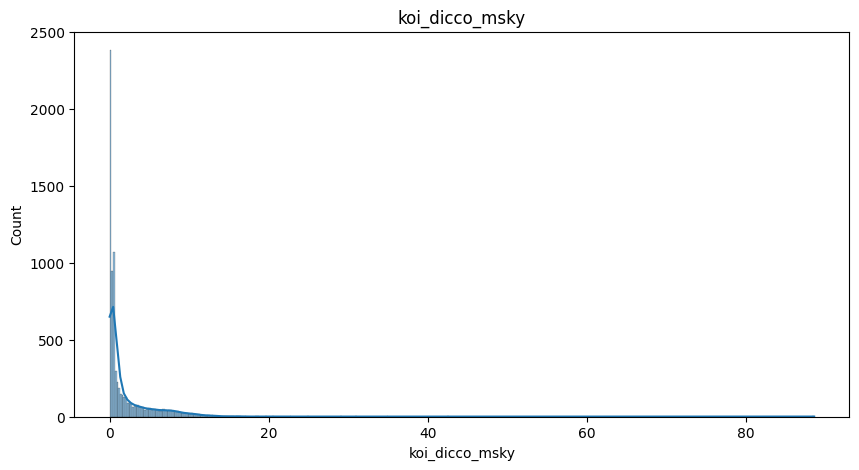

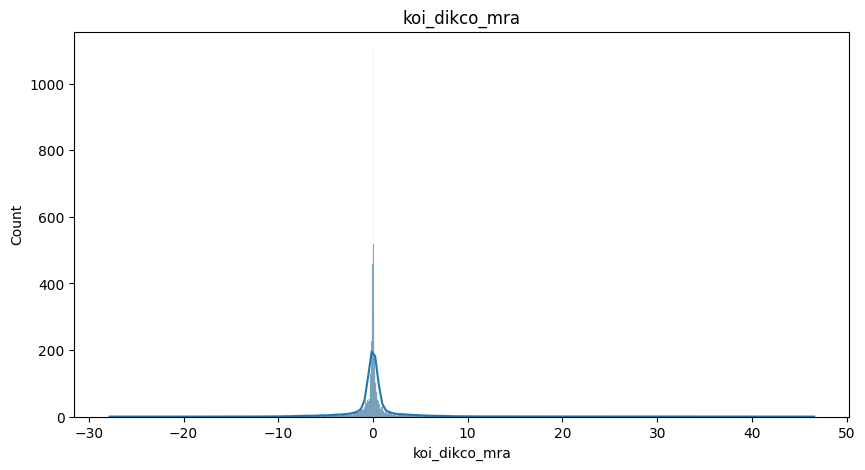

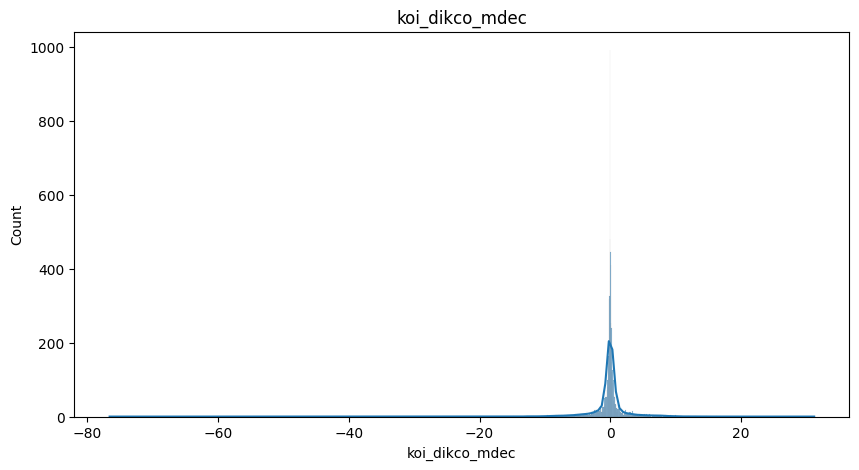

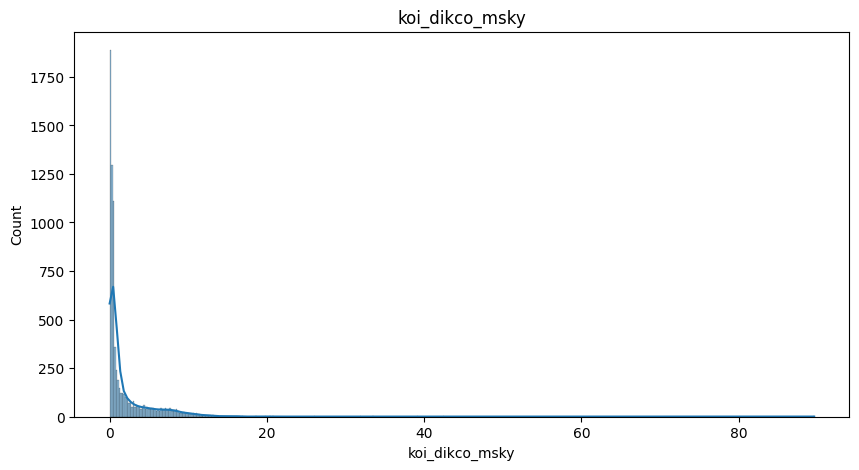

In [27]:
# distribution of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [52]:
# columns with single value
single_value_cols = df.columns[df.nunique() == 1]


In [51]:
single_value_cols

Index(['koi_eccen', 'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3'], dtype='object')

In [53]:
df.drop(single_value_cols, axis=1, inplace=True)
df_wrong.drop(single_value_cols, axis=1, inplace=True)

In [59]:
df_wrong = df_wrong[df.columns]

In [60]:
df.shape

(7573, 53)

In [61]:
df_wrong.shape

(9, 53)

In [54]:
df = df.copy()
df.to_csv("../data/df.csv", index=False)

In [55]:
df.head()

,label,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,9.488036,170.538750,2455003.539,0.146,2.95750,615.8,0.022344,3.20796,2.26,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,1,54.418383,162.513840,2454995.514,0.586,4.50700,874.8,0.027954,3.02368,2.83,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
3,0,1.736952,170.307565,2455003.308,1.276,2.40641,8079.2,0.387394,0.22080,33.46,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,1,2.525592,171.595550,2455004.596,0.701,1.65450,603.3,0.024064,1.98635,2.75,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
5,1,11.094321,171.201160,2455004.201,0.538,4.59450,1517.5,0.036779,0.67324,3.90,...,-0.120,0.140,0.00004,0.00000,0.040,-0.070,0.080,-0.020,-0.080,0.080


Text(0.5, 1.0, 'Distribution of target variable')

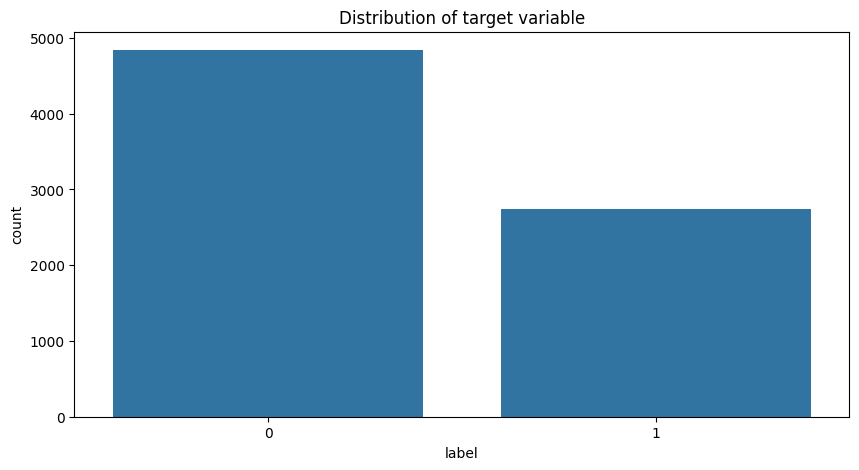

In [57]:
# plot for distribution of target variable
plt.figure(figsize=(10, 5))
sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts())
plt.title('Distribution of target variable')

In [58]:
#check correlation with target variable
correlation = df.corr()
correlation['label'].sort_values(ascending=False)


label               1.000000
koi_count           0.483403
koi_smet            0.322880
koi_incl            0.299356
koi_fwm_stat_sig    0.292315
koi_tce_plnt_num    0.256491
koi_ldm_coeff1      0.224342
koi_slogg           0.172946
koi_bin_oedp_sig    0.162551
koi_quarters        0.149763
koi_fwm_sdec        0.119053
dec                 0.116421
koi_gmag            0.071407
koi_kepmag          0.057613
koi_rmag            0.055499
koi_imag            0.052660
koi_zmag            0.050882
koi_jmag            0.031875
koi_kmag            0.024988
koi_hmag            0.024538
koi_dikco_mdec      0.018630
koi_dicco_mdec      0.015987
koi_fwm_srao        0.012726
koi_dicco_mra       0.011046
koi_dikco_mra       0.010222
koi_fwm_pdeco       0.006232
koi_fwm_sdeco       0.003934
koi_fwm_prao        0.001416
koi_prad           -0.023574
koi_insol          -0.037729
koi_ror            -0.062708
koi_srho           -0.063970
koi_time0bk        -0.064363
koi_time0          -0.064363
koi_impact    

In [62]:
#use standard scaler to scale all data other than label
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.columns.difference(['label'])] = scaler.fit_transform(df_scaled[df_scaled.columns.difference(['label'])])
#save the scaled data sa data_scaled.csv
df_scaled.to_csv("../data/data_scaled.csv", index=False)

df_wrong_scaled = df_wrong.copy()
df_wrong_scaled[df_wrong_scaled.columns.difference(['label'])] = scaler.fit_transform(df_wrong_scaled[df_wrong_scaled.columns.difference(['label'])])
df_wrong_scaled.to_csv("../data/data_wrong_scaled.csv", index=False)


In [62]:
df_scaled.head()

,label,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,-0.376795,0.129565,0.129569,-0.192339,-0.403387,-0.311181,-0.084429,-0.075096,-0.031502,...,0.035792,0.049508,-0.001167,0.002805,0.005125,0.091624,-0.542413,0.041694,0.146704,-0.496176
1,1,0.025065,0.001925,0.001928,-0.052296,-0.176294,-0.308296,-0.082620,-0.078969,-0.031319,...,-0.011983,0.062401,0.012597,-0.002202,0.165035,0.017432,-0.482045,0.205379,0.075875,-0.439089
3,0,-0.446121,0.125888,0.125895,0.167317,-0.484154,-0.228038,0.033259,-0.137879,-0.021521,...,0.011409,0.007808,0.050369,-0.005907,-0.090421,0.071963,-0.514135,-0.092847,0.068046,-0.510131
4,1,-0.439068,0.146374,0.146381,-0.015694,-0.594353,-0.311321,-0.083875,-0.100771,-0.031345,...,0.015961,0.017944,0.003314,0.007611,0.021116,-0.015955,-0.574185,0.037702,0.038596,-0.575464
5,1,-0.362428,0.140101,0.140099,-0.067574,-0.163470,-0.301136,-0.079775,-0.128370,-0.030977,...,0.011003,0.013943,0.002674,0.008312,0.025114,-0.008535,-0.580539,0.001771,0.001318,-0.572293
